In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time as _time
from datetime import datetime, timedelta 
import string

In [2]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
train = pd.read_csv("flights_train.csv")
test = pd.read_csv("flights_test.csv")
submit_sample = pd.read_csv("submit_sample.csv")
storms = pd.read_csv("StormEvents2015.csv", sep=';')
stateab = pd.read_excel("stateAbb.xlsx")

In [3]:
train.head(5)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0


In [4]:
airports.head(5)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


### Storm data preparation

In [5]:
storms.head(5)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,...,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,"END_LON,,,,"
0,201501,27,1200,201501,28,400,92561,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
1,201501,24,700,201501,24,2100,92625,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
2,201501,27,600,201501,27,1200,92561,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
3,201502,14,800,201502,15,1700,93895,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
4,201502,7,2200,201502,10,500,93902,NEW HAMPSHIRE,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"


In [6]:
stateab.head(5)

,State,StateAb
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [7]:
print("Number of columns: {}". format(len(storms.columns)))
print("Number of records: {}". format(len(storms)))

Number of columns: 40
Number of records: 42197


In [8]:
storms.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'STATE', 'STATE_FIPS', 'YEAR',
       'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO',
       'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'MAGNITUDE',
       'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON,,,,'],
      dtype='object')

In [9]:
storms['STATE'] = storms['STATE'].replace(['NEW HAMPSHIRE'],'NH')
storms['STATE'] = storms['STATE'].replace(['ARKANSAS'],'AR')
storms['STATE'] = storms['STATE'].replace(['OKLAHOMA'],'OK')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'TX')
storms['STATE'] = storms['STATE'].replace(['ALABAMA'],'AL')
storms['STATE'] = storms['STATE'].replace(['ALASKA'],'AK')
storms['STATE'] = storms['STATE'].replace(['ARIZONA'],'AZ')
storms['STATE'] = storms['STATE'].replace(['CALIFORNIA'],'CA')
storms['STATE'] = storms['STATE'].replace(['COLORADO'],'CO')
storms['STATE'] = storms['STATE'].replace(['CONNECTICUT'],'CT')
storms['STATE'] = storms['STATE'].replace(['DELAWARE'],'DE')
storms['STATE'] = storms['STATE'].replace(['FLORIDA'],'FL')
storms['STATE'] = storms['STATE'].replace(['GEORGIA'],'GA')
storms['STATE'] = storms['STATE'].replace(['HAWAII'],'HI')
storms['STATE'] = storms['STATE'].replace(['IDAHO'],'ID')
storms['STATE'] = storms['STATE'].replace(['ILLINOIS'],'IL')
storms['STATE'] = storms['STATE'].replace(['INDIANA'],'IN')
storms['STATE'] = storms['STATE'].replace(['IOWA'],'IA')
storms['STATE'] = storms['STATE'].replace(['KANSAS'],'KS')
storms['STATE'] = storms['STATE'].replace(['KENTUCKY'],'KY')
storms['STATE'] = storms['STATE'].replace(['LOUISIANA'],'LA')
storms['STATE'] = storms['STATE'].replace(['MAINE'],'ME')
storms['STATE'] = storms['STATE'].replace(['MARYLAND'],'MD')
storms['STATE'] = storms['STATE'].replace(['MASSACHUSETTS'],'MA')
storms['STATE'] = storms['STATE'].replace(['MICHIGAN'],'MI')
storms['STATE'] = storms['STATE'].replace(['MINNESOTA'],'MN')
storms['STATE'] = storms['STATE'].replace(['MISSISSIPPI'],'MS')
storms['STATE'] = storms['STATE'].replace(['MISSOURI'],'MO')
storms['STATE'] = storms['STATE'].replace(['MONTANA'],'MT')
storms['STATE'] = storms['STATE'].replace(['NEBRASKA'],'NE')
storms['STATE'] = storms['STATE'].replace(['NEVADA'],'NV')
storms['STATE'] = storms['STATE'].replace(['NEW JERSEY'],'NJ')
storms['STATE'] = storms['STATE'].replace(['NEW MEXICO'],'NM')
storms['STATE'] = storms['STATE'].replace(['NEW YORK'],'NY')
storms['STATE'] = storms['STATE'].replace(['NORTH CAROLINA'],'NC')
storms['STATE'] = storms['STATE'].replace(['NORTH DAKOTA'],'ND')
storms['STATE'] = storms['STATE'].replace(['OHIO'],'OH')
storms['STATE'] = storms['STATE'].replace(['OREGON'],'OR')
storms['STATE'] = storms['STATE'].replace(['PENSSYLVANIA'],'PA')
storms['STATE'] = storms['STATE'].replace(['RHODE ISLAND'],'RI')
storms['STATE'] = storms['STATE'].replace(['SOUTH DAKOTA'],'SD')
storms['STATE'] = storms['STATE'].replace(['TENNESSEE'],'MO')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'MT')
storms['STATE'] = storms['STATE'].replace(['UTAH'],'UT')
storms['STATE'] = storms['STATE'].replace(['VERMONT'],'VT')
storms['STATE'] = storms['STATE'].replace(['VIRGINIA'],'VA')
storms['STATE'] = storms['STATE'].replace(['WASHINGTON'],'WA')
storms['STATE'] = storms['STATE'].replace(['WEST VIRGINIA'],'WV')
storms['STATE'] = storms['STATE'].replace(['WISCONSIN'],'WI')
storms['STATE'] = storms['STATE'].replace(['WYOMING'],'WY')

storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['January'], '1')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['February'], '2')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['March'], '3')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['April'], '4')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['May'], '5')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['June'], '6')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['July'], '7')

In [10]:
storms.head(5)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,...,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,"END_LON,,,,"
0,201501,27,1200,201501,28,400,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
1,201501,24,700,201501,24,2100,92625,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
2,201501,27,600,201501,27,1200,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
3,201502,14,800,201502,15,1700,93895,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"
4,201502,7,2200,201502,10,500,93902,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,"


In [11]:
storms['BEGIN_MONTH'] = [str(storms['BEGIN_YEARMONTH'][i])[-1] for i in range(len(storms['BEGIN_YEARMONTH']))]
storms['END_MONTH'] = [str(storms['END_YEARMONTH'][i])[-1] for i in range(len(storms['END_YEARMONTH']))]

### Merging storm data with train data on origin states

In [72]:
origin = pd.merge(train[['YEAR', 'MONTH', 'DAY', 'ORIGIN_AIRPORT']], airports[['IATA_CODE','STATE']], how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')


In [73]:
storms['BEGIN_MONTH'] = storms['BEGIN_MONTH'].astype(int)

In [74]:
storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42197 entries, 0 to 42196
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   YEAR         42197 non-null  int64 
 1   BEGIN_DAY    42197 non-null  int64 
 2   BEGIN_MONTH  42197 non-null  int64 
 3   END_DAY      42197 non-null  int64 
 4   END_MONTH    42197 non-null  object
 5   STATE        42197 non-null  object
 6   EVENT_TYPE   42197 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.3+ MB


In [75]:
origin_storm_1 = pd.merge(origin[:1000000], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [76]:
origin_storm_1 = origin_storm_1[(origin_storm_1['DAY'] >= origin_storm_1['BEGIN_DAY']) & (origin_storm_1['DAY'] <= origin_storm_1['END_DAY'])]


In [77]:
origin_storm_1.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
1,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
2,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
3,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
4,2015,1,1,FAI,FAI,AK,1,1,2,1,Winter Storm


In [78]:
origin_storm_2 = pd.merge(origin[1000000:2000000], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [79]:
origin_storm_2 = origin_storm_2[(origin_storm_2['DAY'] >= origin_storm_2['BEGIN_DAY']) & (origin_storm_2['DAY'] <= origin_storm_2['END_DAY'])]


In [80]:
origin_storm_2.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
1,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
2,2015,3,9,DFW,DFW,TX,9,3,9,3,Flood
3,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
4,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood


In [81]:
origin_storm_3 = pd.merge(origin[2000000:], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [82]:
origin_storm_3 = origin_storm_3[(origin_storm_3['DAY'] >= origin_storm_3['BEGIN_DAY']) & (origin_storm_3['DAY'] <= origin_storm_3['END_DAY'])]


In [83]:
origin_storm_3.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind
1,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind
2,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind
3,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind
4,2015,5,11,DTW,DTW,MI,11,5,11,5,Thunderstorm Wind


In [84]:
origin_storm = pd.concat([origin_storm_1, origin_storm_2, origin_storm_3], join="outer")

In [85]:
origin_storm = origin_storm.drop_duplicates()

In [86]:
origin_storm = origin_storm.reset_index()

In [87]:
origin_storm = origin_storm.drop('index', axis=1)
origin_storm.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm
1,2015,1,1,FAI,FAI,AK,1,1,2,1,Winter Storm
2,2015,1,1,JNU,JNU,AK,1,1,2,1,Winter Storm
3,2015,1,1,OTZ,OTZ,AK,1,1,2,1,Winter Storm
4,2015,1,1,KTN,KTN,AK,1,1,2,1,Winter Storm


### Merging storm data with train data on destination states

In [88]:
dest = pd.merge(train[['YEAR', 'MONTH', 'DAY', 'DESTINATION_AIRPORT']], airports[['IATA_CODE','STATE']], how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')


In [89]:
dest.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE
0,2015,1,1,SEA,SEA,WA
1,2015,1,1,PBI,PBI,FL
2,2015,1,1,CLT,CLT,NC
3,2015,1,1,MIA,MIA,FL
4,2015,1,1,ANC,ANC,AK


In [90]:
dest_storm_1 = pd.merge(dest[:1000000], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [91]:
dest_storm_1 = dest_storm_1[(dest_storm_1['DAY'] >= dest_storm_1['BEGIN_DAY']) & (dest_storm_1['DAY'] <= dest_storm_1['END_DAY'])]


In [92]:
dest_storm_1.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,1,1,PBI,PBI,FL,1,1,4,1,High Surf
1,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf
2,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf
3,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf
4,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf


In [93]:
dest_storm_2 = pd.merge(dest[1000000:2000000], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [94]:
dest_storm_2 = dest_storm_2[(dest_storm_2['DAY'] >= dest_storm_2['BEGIN_DAY']) & (dest_storm_2['DAY'] <= dest_storm_2['END_DAY'])]


In [95]:
dest_storm_2.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
1,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
2,2015,3,9,DFW,DFW,TX,9,3,9,3,Flood
3,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood
4,2015,3,9,DFW,DFW,TX,9,3,9,3,Flash Flood


In [96]:
dest_storm_3 = pd.merge(dest[2000000:], storms[['YEAR','BEGIN_DAY','BEGIN_MONTH','END_DAY','END_MONTH','STATE','EVENT_TYPE']],
                        how='inner', left_on=['YEAR', 'MONTH', 'STATE', 'DAY'], right_on=['YEAR','BEGIN_MONTH','STATE', 'BEGIN_DAY'])


In [97]:
dest_storm_3 = dest_storm_3[(dest_storm_3['DAY'] >= dest_storm_3['BEGIN_DAY']) & (dest_storm_3['DAY'] <= dest_storm_3['END_DAY'])]


In [98]:
dest_storm_3.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind
1,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind
2,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind
3,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind
4,2015,5,11,SBN,SBN,IN,11,5,11,5,Thunderstorm Wind


In [99]:
dest_storm = pd.concat([dest_storm_1, dest_storm_2, dest_storm_3], join="outer")

In [100]:
dest_storm = dest_storm.drop_duplicates()

In [101]:
dest_storm = dest_storm.reset_index()

In [102]:
dest_storm = dest_storm.drop('index', axis=1)
dest_storm.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE
0,2015,1,1,PBI,PBI,FL,1,1,4,1,High Surf
1,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf
2,2015,1,1,FLL,FLL,FL,1,1,4,1,High Surf
3,2015,1,1,MCO,MCO,FL,1,1,4,1,High Surf
4,2015,1,1,TPA,TPA,FL,1,1,4,1,High Surf


### One-hot encoding event_type

In [103]:
origin_storm['ORIGIN_EVENT_FL'] = np.where(origin_storm['EVENT_TYPE'].isnull() == False, 1, 0)
dest_storm['DEST_EVENT_FL'] = np.where(dest_storm['EVENT_TYPE'].isnull() == False, 1, 0)

In [104]:
dest_storm.head()

,YEAR,MONTH,DAY,DESTINATION_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE,DEST_EVENT_FL
0,2015,1,1,PBI,PBI,FL,1,1,4,1,High Surf,1
1,2015,1,1,MIA,MIA,FL,1,1,4,1,High Surf,1
2,2015,1,1,FLL,FLL,FL,1,1,4,1,High Surf,1
3,2015,1,1,MCO,MCO,FL,1,1,4,1,High Surf,1
4,2015,1,1,TPA,TPA,FL,1,1,4,1,High Surf,1


In [105]:
origin_storm.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE,BEGIN_DAY,BEGIN_MONTH,END_DAY,END_MONTH,EVENT_TYPE,ORIGIN_EVENT_FL
0,2015,1,1,ANC,ANC,AK,1,1,2,1,Winter Storm,1
1,2015,1,1,FAI,FAI,AK,1,1,2,1,Winter Storm,1
2,2015,1,1,JNU,JNU,AK,1,1,2,1,Winter Storm,1
3,2015,1,1,OTZ,OTZ,AK,1,1,2,1,Winter Storm,1
4,2015,1,1,KTN,KTN,AK,1,1,2,1,Winter Storm,1


In [115]:
origin.head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,IATA_CODE,STATE
0,2015,1,1,ANC,ANC,AK
1,2015,1,1,LAX,LAX,CA
2,2015,1,1,SFO,SFO,CA
3,2015,1,1,LAX,LAX,CA
4,2015,1,1,SEA,SEA,WA


In [107]:
print(len(origin_storm))
print(len(origin_storm[['YEAR', 'MONTH', 'DAY', 'STATE','ORIGIN_EVENT_FL']].drop_duplicates()))

41848
2611


In [108]:
otemp = origin_storm[['YEAR', 'MONTH', 'DAY', 'STATE','ORIGIN_EVENT_FL']].drop_duplicates()
dtemp = dest_storm[['YEAR', 'MONTH', 'DAY', 'STATE','DEST_EVENT_FL']].drop_duplicates()

print(otemp.info())
print(dtemp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2611 entries, 0 to 41846
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   YEAR             2611 non-null   int64 
 1   MONTH            2611 non-null   int64 
 2   DAY              2611 non-null   int64 
 3   STATE            2611 non-null   object
 4   ORIGIN_EVENT_FL  2611 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 122.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 41773
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   YEAR           2615 non-null   int64 
 1   MONTH          2615 non-null   int64 
 2   DAY            2615 non-null   int64 
 3   STATE          2615 non-null   object
 4   DEST_EVENT_FL  2615 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 122.6+ KB
None


In [130]:
otr = pd.merge(train, airports[['IATA_CODE','STATE']], how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
otr = otr.drop(columns='IATA_CODE', axis=1)
otr = otr.rename(columns={'STATE':'ORIGIN_STATE'})

dtr = pd.merge(otr, airports[['IATA_CODE','STATE']], how='left', left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')
dtr = dtr.drop(columns='IATA_CODE', axis=1)
dtr = dtr.rename(columns={'STATE':'DESTINATION_STATE'})

In [132]:
print(len(train))
print(len(dtr))

2818553
2818553


In [131]:
dtr.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,AK,WA
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,CA,FL
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,CA,NC
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,CA,FL
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,WA,AK


In [135]:
# Merge for origin state events
train_evnt = pd.merge(dtr, otemp, how='left', left_on=['YEAR', 'MONTH', 'DAY', 'ORIGIN_STATE'], right_on=['YEAR', 'MONTH', 'DAY', 'STATE'])
train_evnt = train_evnt.drop(columns='STATE', axis=1)

In [230]:
# Merge for destination state events
train_evntf = pd.merge(train_evnt, dtemp, how='left', left_on=['YEAR', 'MONTH', 'DAY', 'DESTINATION_STATE'], right_on=['YEAR', 'MONTH', 'DAY', 'STATE'])
train_evntf = train_evntf.drop(columns='STATE', axis=1)

In [231]:
print(len(train))
print(len(train_evntf))
train_evntf.head()

2818553
2818553


,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,21.0,15.0,205.0,1448,430,-22.0,AK,WA,1.0,NaN
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,FL,1.0,1.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,16.0,34.0,286.0,2296,806,5.0,CA,NC,1.0,NaN
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,15.0,30.0,285.0,2342,805,-9.0,CA,FL,1.0,1.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,11.0,35.0,235.0,1448,320,-21.0,WA,AK,NaN,1.0


In [232]:
# One-hot re-encoding
train_evntf['ORIGIN_EVENT_FL'] = np.where(train_evntf['ORIGIN_EVENT_FL'].isnull() == False, 1, 0)
train_evntf['DEST_EVENT_FL'] = np.where(train_evntf['DEST_EVENT_FL'].isnull() == False, 1, 0)

In [233]:
train_evntf.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,21.0,15.0,205.0,1448,430,-22.0,AK,WA,1,0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,12.0,14.0,280.0,2330,750,-9.0,CA,FL,1,1
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,16.0,34.0,286.0,2296,806,5.0,CA,NC,1,0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,15.0,30.0,285.0,2342,805,-9.0,CA,FL,1,1
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,11.0,35.0,235.0,1448,320,-21.0,WA,AK,0,1


In [148]:
train_evntf.to_csv("StormTrainData.csv")

### Feature engineering

(Number of delayed flights in a particular airport)/(Number of all flights in a particular airport)

#### Proportion of delays in origin airports

In [252]:
test.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912


In [256]:
numfl = train_evntf.groupby('ORIGIN_AIRPORT')['AIRLINE'].count()
numdelfl = train_evntf[train_evntf['ARRIVAL_DELAY'] > 0].groupby('ORIGIN_AIRPORT')['AIRLINE'].count()

In [257]:
numfl = pd.DataFrame(numfl)
numfl = numfl.rename(columns={'AIRLINE':'AIRLINE_NUM'})

numdelfl = pd.DataFrame(numdelfl)
numdelfl = numdelfl.rename(columns={'AIRLINE':'AIRLINE_DEL_NUM'})

In [258]:
print(len(numfl))
print(len(numdelfl))

322
322


In [259]:
fl = pd.merge(numfl, numdelfl, how='inner', on='ORIGIN_AIRPORT')
print(len(fl))
fl.head()

322


,AIRLINE_NUM,AIRLINE_DEL_NUM
ORIGIN_AIRPORT,,
ABE,1168,501
ABI,1238,473
ABQ,10014,3847
ABR,357,112
ABY,476,169


In [260]:
fl['ORIGIN_DEL_PROP'] = fl['AIRLINE_DEL_NUM']/fl['AIRLINE_NUM']
fl.head()

,AIRLINE_NUM,AIRLINE_DEL_NUM,ORIGIN_DEL_PROP
ORIGIN_AIRPORT,,,
ABE,1168,501,0.428938
ABI,1238,473,0.382068
ABQ,10014,3847,0.384162
ABR,357,112,0.313725
ABY,476,169,0.355042


In [261]:
test.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912


In [262]:
#train_evnt2 = pd.merge(train_evntf, fl, how='left', on='ORIGIN_AIRPORT')
test2 = pd.merge(test, fl, how='left', on='ORIGIN_AIRPORT')

In [263]:
#train_evnt2.head()
test2.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,AIRLINE_NUM,AIRLINE_DEL_NUM,ORIGIN_DEL_PROP
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,71010,30081,0.423616
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,76788,31399,0.408905
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,103511,44871,0.433490
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,71010,30081,0.423616
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,7888,2509,0.318078


In [264]:
#train_evnt3 = train_evnt2.drop(columns=['AIRLINE_NUM','AIRLINE_DEL_NUM'])
test3 = test2.drop(columns=['AIRLINE_NUM','AIRLINE_DEL_NUM'])

In [265]:
test3.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_DEL_PROP
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,0.423616
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,0.408905
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,0.433490
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,0.423616
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,0.318078


#### Proportion of delays in destination airports

In [267]:
numfl = train_evntf.groupby('DESTINATION_AIRPORT')['AIRLINE'].count()
numdelfl = train_evntf[train_evntf['ARRIVAL_DELAY'] > 0].groupby('DESTINATION_AIRPORT')['AIRLINE'].count()

In [268]:
numfl = pd.DataFrame(numfl)
numfl = numfl.rename(columns={'AIRLINE':'AIRLINE_NUM'})

numdelfl = pd.DataFrame(numdelfl)
numdelfl = numdelfl.rename(columns={'AIRLINE':'AIRLINE_DEL_NUM'})

In [269]:
print(len(numfl))
print(len(numdelfl))

322
322


In [270]:
fl = pd.merge(numfl, numdelfl, how='inner', on='DESTINATION_AIRPORT')
print(len(fl))
fl.head()

322


,AIRLINE_NUM,AIRLINE_DEL_NUM
DESTINATION_AIRPORT,,
ABE,1167,458
ABI,1233,534
ABQ,10046,4396
ABR,353,67
ABY,476,193


In [271]:
fl['DEST_DEL_PROP'] = fl['AIRLINE_DEL_NUM']/fl['AIRLINE_NUM']
fl.head()

,AIRLINE_NUM,AIRLINE_DEL_NUM,DEST_DEL_PROP
DESTINATION_AIRPORT,,,
ABE,1167,458,0.392459
ABI,1233,534,0.433090
ABQ,10046,4396,0.437587
ABR,353,67,0.189802
ABY,476,193,0.405462


In [272]:
#train_evnt2 = pd.merge(train_evnt3, fl, how='left', on='DESTINATION_AIRPORT')
test2 = pd.merge(test3, fl, how='left', on='DESTINATION_AIRPORT')

In [273]:
#train_evnt2.head()
test2.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_DEL_PROP,AIRLINE_NUM,AIRLINE_DEL_NUM,DEST_DEL_PROP
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,...,41.0,11.0,52.0,177.0,1222,500,0.423616,79690,34083,0.427695
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,...,2400.0,21.0,21.0,303.0,2296,808,0.408905,53097,20148,0.379456
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,...,2400.0,36.0,36.0,223.0,1619,548,0.433490,7834,3295,0.420603
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,...,53.0,14.0,107.0,178.0,1299,503,0.423616,58245,21625,0.371277
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,...,17.0,20.0,37.0,364.0,2846,912,0.318078,145504,62064,0.426545


In [274]:
test4 = test2.drop(columns=['AIRLINE_NUM','AIRLINE_DEL_NUM'])

In [275]:
test4.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_DEL_PROP,DEST_DEL_PROP
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,0.423616,0.427695
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,0.408905,0.379456
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,0.433490,0.420603
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,0.423616,0.371277
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,0.318078,0.426545


### Departure delay calculator

In [280]:
def dep_whoff(dataset):
    dep = (dataset.WHEELS_OFF-dataset.WHEELS_OFF%100)*60/100 + dataset.WHEELS_OFF%100
    sch = (dataset.SCHEDULED_DEPARTURE-dataset.SCHEDULED_DEPARTURE%100)*60/100 + dataset.SCHEDULED_DEPARTURE%100

    # the difference 
    dif = pd.DataFrame(dep - sch)
    
    dif[abs(dif) > 720] = np.sign(dif[abs(dif) > 720])*(abs(dif[abs(dif) > 720]) - 1440)
    dif[dif < -90] = dif[dif < -90] + 1440
    diff = dif.rename({0: 'DEPARTURE_DELAY'}, axis = 1)
    train_dep = dataset.join(diff)
    return train_dep

train_whoff = dep_whoff(train_evnt4)
train_whoff.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_STATE,DESTINATION_STATE,ORIGIN_EVENT_FL,DEST_EVENT_FL,ORIGIN_DEL_PROP,DEST_DEL_PROP,DEPARTURE_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,1448,430,-22.0,AK,WA,1,0,0.318078,0.346709,10.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,2330,750,-9.0,CA,FL,1,1,0.433490,0.409759,4.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,2296,806,5.0,CA,NC,1,0,0.408905,0.379456,14.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,2342,805,-9.0,CA,FL,1,1,0.433490,0.397046,10.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,1448,320,-21.0,WA,AK,0,1,0.378185,0.346538,10.0


In [279]:
test_w = dep_whoff(test4)
test_w.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_DEL_PROP,DEST_DEL_PROP,DEPARTURE_DELAY
0,0,2015,7,1,3,NK,298,N624NK,LAS,IAH,3,41.0,11.0,52.0,177.0,1222,500,0.423616,0.427695,49.0
1,1,2015,7,1,3,AA,1965,N507AY,SFO,CLT,5,2400.0,21.0,21.0,303.0,2296,808,0.408905,0.379456,16.0
2,2,2015,7,1,3,DL,2020,N3759,LAX,MEM,5,2400.0,36.0,36.0,223.0,1619,548,0.433490,0.420603,31.0
3,3,2015,7,1,3,NK,612,N629NK,LAS,MSP,5,53.0,14.0,107.0,178.0,1299,503,0.423616,0.371277,62.0
4,4,2015,7,1,3,UA,1044,N39418,ANC,ORD,8,17.0,20.0,37.0,364.0,2846,912,0.318078,0.426545,29.0


### Multiple regression

In [292]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X_train = train_whoff[['DISTANCE','TAXI_OUT','WHEELS_OFF','ORIGIN_DEL_PROP','DEST_DEL_PROP','DEPARTURE_DELAY']].values
y_train = train_whoff["ARRIVAL_DELAY"].values

model.fit(X_train, y_train)

X_test = test_w[['DISTANCE','TAXI_OUT','WHEELS_OFF','ORIGIN_DEL_PROP','DEST_DEL_PROP','DEPARTURE_DELAY']].values

y_pred = model.predict(X_test)
y_pred

array([ 29.3480256 , -10.76045556,   4.69421051, ..., -12.38071747,
        -2.07181738,  -2.95476889])

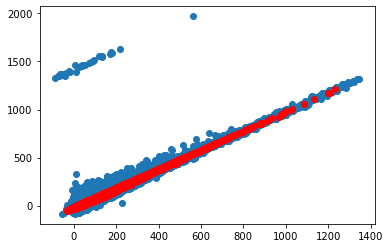

In [293]:
from matplotlib import pyplot as plt

plt.scatter(train_whoff.DEPARTURE_DELAY, train_whoff.ARRIVAL_DELAY)
plt.scatter(test_w['DEPARTURE_DELAY'], y_pred, c='r')

In [294]:
pd.DataFrame(y_pred, columns=['ARRIVAL_DELAY']).to_csv('submission.csv', index_label='id')

### Gradient Boosting

In [298]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error

In [305]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
}

In [304]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
import keras

### Typecasting date and time

In [4]:
def scheduled_time_func(year, month, day, time):
    time = round(time)
    if day <= 9:
        day_string = '0'+ str(day)
    else:
        day_string = str(day)
    
    my_string = '0000'

    my_string = '0000' + str(time)

    length_string = len(str(time))

    time_string = my_string[length_string:]
    time_string = time_string[0:2]+':'+time_string[2:4]

    
    date_string =str(year)+ '-'+'0'+str(month)+'-'+day_string+ ' ' +time_string+ ':00' 
    
    datetime_object = datetime.fromisoformat(date_string)
    return datetime_object

In [5]:
def departure_time_func(year, month, day, time, scheduledDeparture, arrival_delay):
    time = round(time)
    if day <= 9:
        day_string = '0'+ str(day)
    else:
        day_string = str(day)
    
    my_string = '0000'

    my_string = '0000' + str(time)

    length_string = len(str(time))

    time_string = my_string[length_string:]
    time_string = time_string[0:2]+':'+time_string[2:4]

    
    date_string =str(year)+ '-'+'0'+str(month)+'-'+day_string+ ' ' +time_string+ ':00' 
    
    datetime_object = datetime.fromisoformat(date_string)
    
    #if(scheduledDeparture < datetime_object)and(arrival_delay<1440):
    #    datetime_object = datetime_object -timedelta(days=1)
    #elif arrival_delay>1440:
    #    datetime_object = datetime_object + timedelta(days=1)
    #else:
    #        datetime_object = datetime_object
    return datetime_object

In [6]:
train.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0


In [7]:
train.loc[(train['DEPARTURE_TIME'] == 2400)] = 2359


In [8]:
train.loc[(train['MONTH'] >31)] 


,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
29886,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0
29911,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0
41631,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0
58985,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0
60505,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754327,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0
2768126,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0
2785243,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0
2818162,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359.0,2359.0,2359.0,2359.0,2359,2359,2359.0


In [9]:
indexes = train.loc[(train['DAY'] > 31)].index
indexes


Int64Index([  29886,   29911,   41631,   58985,   60505,   60575,   91647,
              91771,   91789,  107023,
            ...
            2737122, 2737137, 2752183, 2753544, 2753812, 2754327, 2768126,
            2785243, 2818162, 2818512],
           dtype='int64', length=221)

In [10]:
trainDropped = train.drop(indexes)
trainDropped.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0


In [11]:
for ind in trainDropped.iterrows():
    trainDropped.at[ind,'TS_SCHEDULED_DEPARTURE']= scheduled_time_func(trainDropped['YEAR'][ind],trainDropped['MONTH'][ind],trainDropped['DAY'][ind],trainDropped['SCHEDULED_DEPARTURE'][ind])
    trainDropped.at[ind,'TS_DEPARTURE_TIME'] = departure_time_func(trainDropped['YEAR'][ind],trainDropped['MONTH'][ind],trainDropped['DAY'][ind],trainDropped['DEPARTURE_TIME'][ind], trainDropped['TS_SCHEDULED_DEPARTURE'][ind], trainDropped['ARRIVAL_DELAY'][ind])


KeyError: 'key of type tuple not found and not a MultiIndex'

In [12]:
storms['STATE'] = storms['STATE'].replace(['NEW HAMPSHIRE'],'NH')
storms['STATE'] = storms['STATE'].replace(['ARKANSAS'],'AR')
storms['STATE'] = storms['STATE'].replace(['OKLAHOMA'],'OK')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'TX')
storms['STATE'] = storms['STATE'].replace(['ALABAMA'],'AL')
storms['STATE'] = storms['STATE'].replace(['ALASKA'],'AK')
storms['STATE'] = storms['STATE'].replace(['ARIZONA'],'AZ')
storms['STATE'] = storms['STATE'].replace(['CALIFORNIA'],'CA')
storms['STATE'] = storms['STATE'].replace(['COLORADO'],'CO')
storms['STATE'] = storms['STATE'].replace(['CONNECTICUT'],'CT')
storms['STATE'] = storms['STATE'].replace(['DELAWARE'],'DE')
storms['STATE'] = storms['STATE'].replace(['FLORIDA'],'FL')
storms['STATE'] = storms['STATE'].replace(['GEORGIA'],'GA')
storms['STATE'] = storms['STATE'].replace(['HAWAII'],'HI')
storms['STATE'] = storms['STATE'].replace(['IDAHO'],'ID')
storms['STATE'] = storms['STATE'].replace(['ILLINOIS'],'IL')
storms['STATE'] = storms['STATE'].replace(['INDIANA'],'IN')
storms['STATE'] = storms['STATE'].replace(['IOWA'],'IA')
storms['STATE'] = storms['STATE'].replace(['KANSAS'],'KS')
storms['STATE'] = storms['STATE'].replace(['KENTUCKY'],'KY')
storms['STATE'] = storms['STATE'].replace(['LOUISIANA'],'LA')
storms['STATE'] = storms['STATE'].replace(['MAINE'],'ME')
storms['STATE'] = storms['STATE'].replace(['MARYLAND'],'MD')
storms['STATE'] = storms['STATE'].replace(['MASSACHUSETTS'],'MA')
storms['STATE'] = storms['STATE'].replace(['MICHIGAN'],'MI')
storms['STATE'] = storms['STATE'].replace(['MINNESOTA'],'MN')
storms['STATE'] = storms['STATE'].replace(['MISSISSIPPI'],'MS')
storms['STATE'] = storms['STATE'].replace(['MISSOURI'],'MO')
storms['STATE'] = storms['STATE'].replace(['MONTANA'],'MT')
storms['STATE'] = storms['STATE'].replace(['NEBRASKA'],'NE')
storms['STATE'] = storms['STATE'].replace(['NEVADA'],'NV')
storms['STATE'] = storms['STATE'].replace(['NEW JERSEY'],'NJ')
storms['STATE'] = storms['STATE'].replace(['NEW MEXICO'],'NM')
storms['STATE'] = storms['STATE'].replace(['NEW YORK'],'NY')
storms['STATE'] = storms['STATE'].replace(['NORTH CAROLINA'],'NC')
storms['STATE'] = storms['STATE'].replace(['NORTH DAKOTA'],'ND')
storms['STATE'] = storms['STATE'].replace(['OHIO'],'OH')
storms['STATE'] = storms['STATE'].replace(['OREGON'],'OR')
storms['STATE'] = storms['STATE'].replace(['PENSSYLVANIA'],'PA')
storms['STATE'] = storms['STATE'].replace(['RHODE ISLAND'],'RI')
storms['STATE'] = storms['STATE'].replace(['SOUTH DAKOTA'],'SD')
storms['STATE'] = storms['STATE'].replace(['TENNESSEE'],'MO')
storms['STATE'] = storms['STATE'].replace(['TEXAS'],'MT')
storms['STATE'] = storms['STATE'].replace(['UTAH'],'UT')
storms['STATE'] = storms['STATE'].replace(['VERMONT'],'VT')
storms['STATE'] = storms['STATE'].replace(['VIRGINIA'],'VA')
storms['STATE'] = storms['STATE'].replace(['WASHINGTON'],'WA')
storms['STATE'] = storms['STATE'].replace(['WEST VIRGINIA'],'WV')
storms['STATE'] = storms['STATE'].replace(['WISCONSIN'],'WI')
storms['STATE'] = storms['STATE'].replace(['WYOMING'],'WY')

storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['January'], '1')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['February'], '2')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['March'], '3')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['April'], '4')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['May'], '5')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['June'], '6')
storms['MONTH_NAME'] = storms['MONTH_NAME'].replace(['July'], '7')

In [13]:
def airport_func (airport):
    if airport  == "AUS":
        state = "TX"
    elif airport == "ANC":
        state = "AK"
    elif airport == "SFO":
        state = "CA"
    elif airport == "LAX":
        state = "CA"
    elif airport == "SEA":
        state = "WA"
    elif airport == "LAS":
        state = "NV"
    elif airport == "DEN":
        state = "CO"
    elif airport == "SLC":
        state = "UT"
    elif airport == "PDX":
        state = "OR"
    elif airport == "FAI":
        state = "AK"
    elif airport == "MSP":
        state = "MN"
    elif airport == "PHX":
        state = "AZ"
    elif airport == "PBG":
        state = "NY"
    elif airport == "IAG":
        state = "NY"
    elif airport == "PSE":
        state = "CA"
    elif airport == "MKE":
        state = "WI"
    elif airport == "ORD":
        state = "IL"
    elif airport == "GEG":
        state = "WA"
    elif airport == "HNL":
        state = "HI"
    elif airport == "ONT":
        state = "CA"
    elif airport == "MCO":
        state = "FA"
    elif airport == "BOS":
        state = "MA"
    elif airport == "HIB":
        state = "MN"
    elif airport == "ABR":
        state = "SD"
    elif airport == "DFW":
        state = "TX"
        
    elif airport == "IAH":
        state = "TX"
    elif airport == "BNA":
        state = "MO"
    elif airport == "BRO":
        state = "TX"
    elif airport == "VPS":
        state = "FA"
    elif airport == "BOI":
        state = "ID"
    elif airport == "PHL":
        state = "PA"
    elif airport == "SBN":
        state = "IN"
    elif airport == "EUG":
        state = "OR"
    elif airport == "IAD":
        state = "VA"
    elif airport == "BUF":
        state = "NY"
    elif airport == "PMW":
        state = "ME"
    elif airport == "JFK":
        state = "NY"
    elif airport == "CRP":
        state = "TX"
    elif airport == "PIA":
        state = "IL"
    elif airport == "FAT":
        state = "CA"
    elif airport == "SMF":
        state = "CA"
    elif airport == "MCI":
        state = "MO"
    elif airport == "ATL":
        state = "GA"
        
    elif airport == "ATL":
        state = "GA"
    elif airport == "JAX":
        state = "FL"
    elif airport == "MFR":
        state = "OR"
    elif airport == "IDA":
        state = "ID"
    elif airport == "MSN":
        state = "WI"
    elif airport == "DCA":
        state = "VA"
    elif airport == "SAT":
        state = "TX"
    elif airport == "CHS":
        state = "SC"
    elif airport == "SBA":
        state = "CA"
    elif airport == "IND":
        state = "IN"
    elif airport == "DLE":
        state = "VA"
    elif airport == "GSP":
        state = "SC"
    elif airport == "BDL":
        state = "CT"
    elif airport == "RIC":
        state = "VA"
    elif airport == "BFL":
        state = "CA"
    elif airport == "OMA":
        state = "NE"
    elif airport == "RDM":
        state = "OR"
    elif airport == "FLL":
        state = "FL"
        
        
    elif airport == "CIP":
        state = "NV"
    elif airport == "TPA":
        state = "CA"
    elif airport == "SYR":
        state = "NY"
    elif airport == "ROC":
        state = "NY"
    elif airport == "TYR":
        state = "TX"
    elif airport == "LAN":
        state = "MI"
    elif airport == "GSO":
        state = "NC"
    elif airport == "EWR":
        state = "NJ"
    elif airport == "PBI":
        state = "CA"
    elif airport == "RSW":
        state = "CA"
    elif airport == "OAK":
        state = "CA"
    elif airport == "PVD":
        state = "RI"
    elif airport == "RNO":
        state = "NV"
    elif airport == "PIT":
        state = "PA"
    elif airport == "ABQ":
        state = "NM"
    elif airport == "MIA":
        state = "FL"
    elif airport == "BWI":
        state = "MD"
    elif airport == "TUL":
        state = "OK"
    elif airport == "LGA":
        state = "NY"
    elif airport == "LIT":
        state = "OR"
    elif airport == "MSY":
        state = "LA"
    
    elif airport == "OKC":
        state = "OK"
    elif airport == "ATW":
        state = "WI"
    elif airport == "PNS":
        state = "FL"
    elif airport == "MEM":
        state = "TN"
    elif airport == "TYS":
        state = "TN"
    elif airport == "MHT":
        state = "WA"
    elif airport == "SAV":
        state = "GA"
    elif airport == "CLT":
        state = "NC"
    elif airport == "GRB":
        state = "WI"
    elif airport == "ABE":
        state = "PA"
    elif airport == "JAN":
        state = "MS"
    elif airport == "OAJ":
        state = "NC"
    elif airport == "FAR":
        state = "ND"
    elif airport == "ERI":
        state = "PA"
    elif airport == "LEX":
        state = "KY"
    elif airport == "CWA":
        state = "WI"
    elif airport == "TIN":
        state = "AK"
    elif airport == "RDU":
        state = "NC"
    elif airport == "BHM":
        state = "AL"
    elif airport == "ACY":
        state = "NJ"
    elif airport == "DTW":
        state = "MI"
    elif airport == "RAP":
        state = "SD"
    elif airport == "TUS":
        state = "AZ"
        
    elif airport == "EAU":
        state = "WI"
    elif airport == "DLH":
        state = "MN"
    elif airport == "FSD":
        state = "SD"
    elif airport == "INL":
        state = "MN"
    elif airport == "SPI":
        state = "IL"
    elif airport == "CLD":
        state = "CA"
    elif airport == "COD":
        state = "WY"
    elif airport == "CMH":
        state = "OH"
    elif airport == "PSC":
        state = "WA"
    elif airport == "CPR":
        state = "WY"
    elif airport == "ACV":
        state = "CA"
    elif airport == "DAL":
        state = "TX"
    elif airport == "GUC":
        state = "CO"
    elif airport == "ORF":
        state = "VA"
    elif airport == "MOT":
        state = "ND"
    elif airport == "MLU":
        state = "LA"
    elif airport == "KOA":
        state = "HI"
    elif airport == "MOV":
        state = "WV"
    elif airport == "SAN":
        state = "CA"
    elif airport == "LAW":
        state = "OK"
    elif airport == "PIB":
        state = "MS"
    elif airport == "MGM":
        state = "AL"
    elif airport == "SBP":
        state = "CA"
        
    elif airport == "COS":
        state = "CO"
    elif airport == "LAR":
        state = "WY"
    elif airport == "DRO":
        state = "CO"
    elif airport == "BIS":
        state = "ND"
    elif airport == "ITO":
        state = "HI"
    elif airport == "BTR":
        state = "LA"
    elif airport == "HLN":
        state = "HI"
    elif airport == "BZN":
        state = "MT"
    elif airport == "MDW":
        state = "IL"
    elif airport == "MDT":
        state = "PA"
    elif airport == "SCE":
        state = "PA"
    elif airport == "LIH":
        state = "HI"
    elif airport == "TWF":
        state = "ID"
    elif airport == "BPT":
        state = "TX"
    elif airport == "GPT":
        state = "MS"
    elif airport == "STC":
        state = "MN"
    elif airport == "HPN":
        state = "NY"
    elif airport == "MLB":
        state = "FL"
    elif airport == "PLN":
        state = "MI"
    elif airport == "CIU":
        state = "MI"
    elif airport == "CAK":
        state = "OH"
    elif airport == "DSM":
        state = "IA"
    elif airport == "BLI":
        state = "WA"
    elif airport == "SHV":
        state = "LA"
        
    elif airport == "SNA":
        state = "CA"
    elif airport == "ALB":
        state = "NY"
    elif airport == "LNK":
        state = "NE"
    elif airport == "CMI":
        state = "IL"
    elif airport == "GTF":
        state = "MT"
    elif airport == "EKO":
        state = "NV"
    elif airport == "LGB":
        state = "CA"
    elif airport == "AVL":
        state = "NC"
    elif airport == "HSV":
        state = "AL"
    elif airport == "XNA":
        state = "AR"
    elif airport == "SUX":
        state = "IA"
    elif airport == "HYS":
        state = "KS"
    elif airport == "MFE":
        state = "TX"
    elif airport == "ISP":
        state = "NY"
    elif airport == "BUR":
        state = "CA"
    elif airport == "DAB":
        state = "FL"
    elif airport == "DAY":
        state = "OH"
    elif airport == "LFT":
        state = "LA"
    elif airport == "LBE":
        state = "PA"
    elif airport == "ASE":
        state = "CO"
    elif airport == "TKC":
        state = "MN"
    elif airport == "ALO":
        state = "IA"
    elif airport == "TLH":
        state = "FL"
        
        
    elif airport == "ELP":
        state = "TX"
    elif airport == "MHK":
        state = "KS"
    elif airport == "IMT":
        state = "MI"
    elif airport == "JNU":
        state = "AK"
    elif airport == "JAC":
        state = "WY"
    elif airport == "MET":
        state = "MA"
    elif airport == "PBQ":
        state = "FL"
    elif airport == "GNV":
        state = "FL"
    elif airport == "BRD":
        state = "MN"
    elif airport == "DIK":
        state = "ND"
    elif airport == "SFD":
        state = "SD"
    elif airport == "LBD":
        state = "AK"
    elif airport == "AVP":
        state = "PA"
    elif airport == "SGF":
        state = "MO"
    elif airport == "COU":
        state = "MO"
    elif airport == "BTM":
        state = "MT"
    elif airport == "ELM":
        state = "NY"
    elif airport == "RKS":
        state = "WY"
    elif airport == "PIH":
        state = "ID"
    elif airport == "SUN":
        state = "ID"
    elif airport == "LWS":
        state = "ID"
    elif airport == "VEL":
        state = "UT"
    elif airport == "SAF":
        state = "NM"
    
    elif airport == "YUM":
        state = "AZ"
    elif airport == "FCA":
        state = "MT"
    elif airport == "GRR":
        state = "MI"
    elif airport == "HDN":
        state = "CO"
    elif airport == "ROA":
        state = "VA"
    elif airport == "CHA":
        state = "TN"
    elif airport == "EYW":
        state = "FL"
    elif airport == "MYR":
        state = "SC"
    elif airport == "CRW":
        state = "WV"
    elif airport == "MQT":
        state = "MI"
    elif airport == "CHO":
        state = "VA"
    elif airport == "GJT":
        state = "CO"
    elif airport == "FWA":
        state = "IN"
    elif airport == "ECP":
        state = "FL"
    elif airport == "EVV":
        state = "IN"
    elif airport == "MSO":
        state = "MT"
    elif airport == "EGE":
        state = "CO"
    elif airport == "AMA":
        state = "TX"
    elif airport == "MLI":
        state = "IL"
    elif airport == "MBS":
        state = "MI"
    elif airport == "GFK":
        state = "ND"
    elif airport == "GRK":
        state = "TX"
    elif airport == "BIL":
        state = "MT"
    elif airport == "OTZ":
        state = "AK"
    
    elif airport == "KTN":
        state = "AK"
    elif airport == "ILM":
        state = "NC"
    elif airport == "PUB":
        state = "CO"
    elif airport == "RHI":
        state = "WI"
    elif airport == "CDC":
        state = "UT"
    elif airport == "HRL":
        state = "TX"
    elif airport == "SCC":
        state = "AK"
    elif airport == "FNT":
        state = "MI"
    elif airport == "LSE":
        state = "WI"
    elif airport == "MMH":
        state = "CA"
    elif airport == "ACT":
        state = "TX"
    elif airport == "FSM":
        state = "AR"
    elif airport == "AGS":
        state = "GA"
    elif airport == "CEC":
        state = "CA"
    elif airport == "ICT":
        state = "KS"
    elif airport == "AEX":
        state = "LA"
    elif airport == "DHN":
        state = "AL"
    elif airport == "LRD":
        state = "TX"
    elif airport == "WRG":
        state = "AK"
    elif airport == "PHF":
        state = "VA"
    elif airport == "CNY":
        state = "UT"
    elif airport == "BRW":
        state = "AK"
    elif airport == "GGG":
        state = "TX"
        
    elif airport == "AZO":
        state = "MI"
    elif airport == "CLL":
        state = "TX"
    elif airport == "SRQ":
        state = "FL"
    elif airport == "ORH":
        state = "MA"
    elif airport == "FLG":
        state = "AZ"
    elif airport == "TRI":
        state = "TN"
    elif airport == "VLD":
        state = "GA"
    elif airport == "SIT":
        state = "AK"
    elif airport == "BQK":
        state = "GA"
    elif airport == "BMI":
        state = "IL"
    elif airport == "PSG":
        state = "AK"
    elif airport == "FAY":
        state = "NC"
    elif airport == "MKG":
        state = "MI"
    elif airport == "CSG":
        state = "GA"
    elif airport == "MAF":
        state = "TX"
    elif airport == "EWN":
        state = "NC"
    elif airport == "OME":
        state = "AK"
    elif airport == "CMX":
        state = "MI"
    elif airport == "JMS":
        state = "ND"
    elif airport == "SGU":
        state = "UT"
    elif airport == "RST":
        state = "MN"
    elif airport == "GTR":
        state = "MS"
    elif airport == "BET":
        state = "AK"
    elif airport == "TOL":
        state = "OH"
        
    elif airport == "APN":
        state = "MI"
    elif airport == "SMX":
        state = "CA"
    elif airport == "LCH":
        state = "LA"
    elif airport == "RDD":
        state = "CA"
    elif airport == "GCK":
        state = "KS"
    elif airport == "DNL":
        state = "GA"
    elif airport == "GRI":
        state = "NE"
    elif airport == "ABY":
        state = "GA"
    elif airport == "SWF":
        state = "NY"
    elif airport == "ILG":
        state = "DE"
    elif airport == "JLN":
        state = "MO"
    elif airport == "ADK":
        state = "AK"
    elif airport == "UST":
        state = "FL"
    elif airport == "TXK":
        state = "AR"
    elif airport == "SPS":
        state = "TX"
    elif airport == "ABI":
        state = "TX"
    elif airport == "YAK":
        state = "AK"
    elif airport == "SJT":
        state = "TX"
    elif airport == "CDN":
        state = "SC"
    elif airport == "OTH":
        state = "OR"
    elif airport == "ADQ":
        state = "AK"
    elif airport == "ROW":
        state = "NM"
        
    elif airport == "BGM":
        state = "NY"
    elif airport == "BGR":
        state = "ME"
    elif airport == "ITH":
        state = "NY"
    elif airport == "ACK":
        state = "MA"
    elif airport == "MVY":
        state = "MA"
    elif airport == "WYS":
        state = "MT"
    elif airport == "DLG":
        state = "AK"
    elif airport == "AKN":
        state = "AK"
    elif airport == "GST":
        state = "AK"
    elif airport == "HYA":
        state = "MA"
    else:
        state = ""
    return state

In [14]:
def jointrain_func(day, month, year, state):
    object_dmy_state = str(day)+'/'+str(month)+'/'+str(year)+'/'+str(state)

    return object_dmy_state

In [15]:
for ind in trainDropped.index:
    trainDropped.at[ind,'ORIGIN_AIRPORT_STATE']= airport_func(trainDropped['ORIGIN_AIRPORT'][ind])
    trainDropped.at[ind,'DESTINATION_AIRPORT_STATE']= airport_func(trainDropped['DESTINATION_AIRPORT'][ind])
    

In [16]:
trainDropped.head()

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_AIRPORT_STATE,DESTINATION_AIRPORT_STATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,21.0,15.0,205.0,1448,430,-22.0,AK,WA
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,12.0,14.0,280.0,2330,750,-9.0,CA,CA
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,16.0,34.0,286.0,2296,806,5.0,CA,NC
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,15.0,30.0,285.0,2342,805,-9.0,CA,FL
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,11.0,35.0,235.0,1448,320,-21.0,WA,AK


In [17]:
storms.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,...,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,201501,27,1200,201501,28,400,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201501,24,700,201501,24,2100,92625,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201501,27,600,201501,27,1200,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201502,14,800,201502,15,1700,93895,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201502,7,2200,201502,10,500,93902,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for ind in storms.index:
    storms.at[ind,'STATE_DATE_DESTINATION']= jointrain_func(storms['BEGIN_DAY'][ind],storms['MONTH_NAME'][ind],storms['YEAR'][ind], storms['STATE'][ind] )

 

In [19]:
stormdates = pd.DataFrame(storms['STATE_DATE_DESTINATION'])
stormdates['EVENT_TYPE']= storms['EVENT_TYPE']


In [20]:
storms.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,STATE,STATE_FIPS,YEAR,...,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,STATE_DATE_DESTINATION
0,201501,27,1200,201501,28,400,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27/1/2015/NH
1,201501,24,700,201501,24,2100,92625,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24/1/2015/NH
2,201501,27,600,201501,27,1200,92561,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27/1/2015/NH
3,201502,14,800,201502,15,1700,93895,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/2/2015/NH
4,201502,7,2200,201502,10,500,93902,NH,33,2015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/2/2015/NH


In [ ]:
for ind in trainDropped.index:
    trainDropped.at[ind,'STATE_DATE_DESTINATION']= jointrain_func(trainDropped['DAY'][ind],trainDropped['MONTH'][ind],trainDropped['YEAR'][ind], trainDropped['DESTINATION_AIRPORT_STATE'][ind] )
    

In [ ]:
for ind in trainDropped.index:
    trainDropped.at[ind,'STATE_DATE_ORIGIN']= jointrain_func(trainDropped['DAY'][ind],trainDropped['MONTH'][ind],trainDropped['YEAR'][ind], trainDropped['ORIGIN_AIRPORT_STATE'][ind] )
   
   

In [ ]:
trainDropped.head()

In [ ]:
mergedPlains = pd.merge(trainDropped, stormdates, how ='left', on= ['STATE_DATE_DESTINATION'])

In [ ]:
mergedPlains.head()

In [ ]:
stormdates.head()

In [ ]:
stormdates = stormdates.rename(columns = {'STATE_DATE_DESTINATION': 'STATE_DATE_ORIGIN'})
stormdates.head()

In [ ]:
mergedPlains = mergedPlains.rename(columns = {'EVENT_TYPE' : 'EVENT_TYPE_DESTINATION'})

In [ ]:
mergedPlains.head()

In [ ]:
mergedPlains = pd.merge(mergedPlains, stormdates, how ='left', on= ['STATE_DATE_ORIGIN'])

In [ ]:
df.to_csv('MergedPlainsStorms.csv')